In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\projects_endtoend\sms-spam-detection\spam.csv",encoding='latin-1')

In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2772,ham,Still in customer place,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...,NaN,NaN,NaN
2562,ham,"Yeah I am, so I'll leave maybe 7ish?",NaN,NaN,NaN
2205,ham,"Haha, my legs and neck are killing me and my a...",NaN,NaN,NaN


## Data Cleaning

In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
## renaming

data.rename(columns = {'v1':'target','v2':'msg'},inplace=True)

In [9]:
data.head(2)

,target,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


## Data Cleaning

In [10]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

In [11]:
data['target'] = encode.fit_transform(data['target'])

In [12]:
data.sample(2)

,target,msg
2118,1,U can WIN å£100 of Music Gift Vouchers every w...
3404,0,"Jus chillaxin, what up"


In [13]:
data.isnull().sum()

target    0
msg       0
dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
data = data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

0

In [17]:
data.shape

(5169, 2)

## EDA

In [18]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

* 4516 --> ham
* 653 --> spam

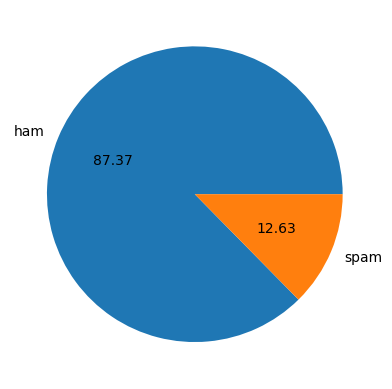

In [19]:
import matplotlib.pyplot as plt

plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

#### insights:
* 12.63% msgs are spam and 87.37% msgs are not spam
* data is imbalanced



* now we will make three new cols: 
--> no. of characters in sms, no. of words in sms, no. of sentences in sms. For this we use nltk

In [21]:
! pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
import warnings

In [25]:
## no. of characters

data['num_characters'] = data['msg'].apply(len)

In [26]:
data.head(5)

,target,msg,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
import nltk
print(nltk.data.path)


['C:\\Users\\SRINIJA/nltk_data', 'c:\\Users\\SRINIJA\\anaconda3\\nltk_data', 'c:\\Users\\SRINIJA\\anaconda3\\share\\nltk_data', 'c:\\Users\\SRINIJA\\anaconda3\\lib\\nltk_data', 'C:\\Users\\SRINIJA\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [32]:
import nltk
nltk.download('all')  # Download all datasets (or choose specific ones like 'punkt', 'stopwords', etc.)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |  

True

In [33]:
## no. of words

data['msg'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: msg, Length: 5169, dtype: object

In [34]:
## no. of words per msg

data['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: msg, Length: 5169, dtype: int64

In [35]:
data['num_words'] = data['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
data.head()

,target,msg,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
## no. of sentences

data['msg'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: msg, Length: 5169, dtype: object

In [38]:
data['num_sentences'] = data['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
data.head()

,target,msg,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
## describe of ham msgs

data[data['target']== 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
## describe of spam msgs

data[data['target']== 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### insights:

* mean no of characters per msg for spam is 137.89 whereas for ham it is 70.45
* we can clearly see the difference of no. of words and no. of sentences for spam and ham

In [43]:
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)


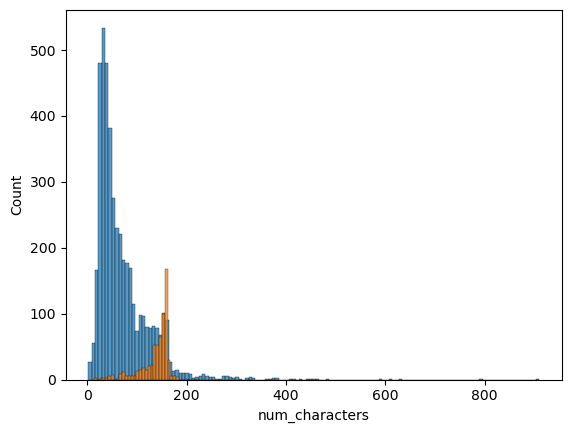

In [44]:
import seaborn as sns

sns.histplot(data[data['target'] == 0]['num_characters'])  ## ham 
sns.histplot(data[data['target'] == 1]['num_characters'])  ## spam
plt.show()

### insights:
* most of the ham msgs has less characters whereas most of the spam msgs has more characters

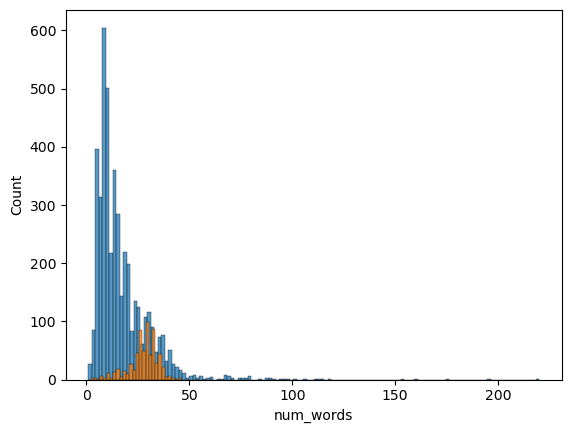

In [45]:
sns.histplot(data[data['target'] == 0]['num_words'])  ## ham 
sns.histplot(data[data['target'] == 1]['num_words'])  ## spam
plt.show()

### insights:
* most of the ham msgs has less words whereas most of the spam msgs has more words

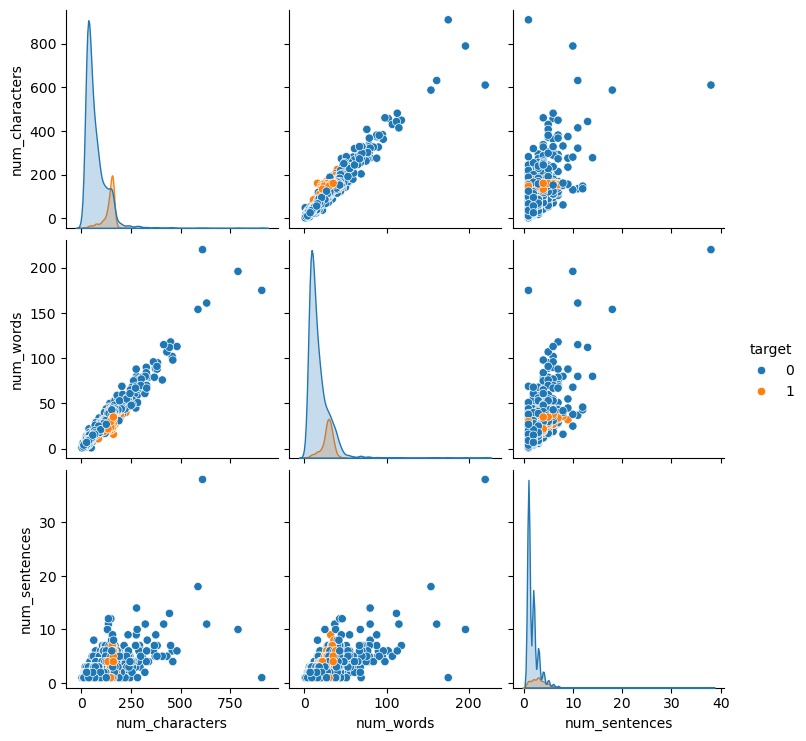

In [46]:
sns.pairplot(data,hue='target')

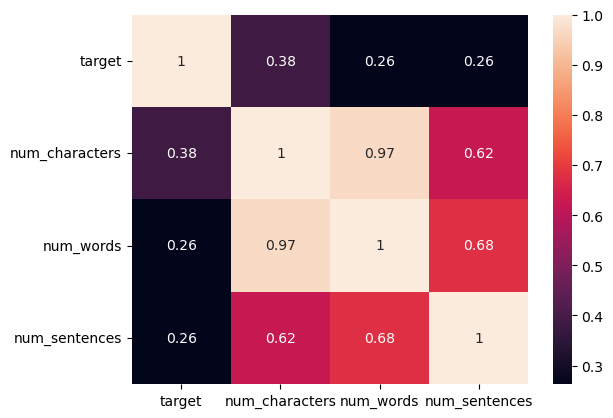

In [47]:
numeric_data = data.select_dtypes(include=[float, int])

# Create the heatmap
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

* more the characters --> more is the tendency of 1(spam)
* all 3 of the independent cols have strong correlation with each other

* so we keep only one col and i.e. num_characters since num_characters and target are highly correlated than other cols

## Data Preprocessing

* Lowercase
* Tokenization
* Removing special characters
* Removing stop words and puntuation
* Stemming

In [48]:
## lowercase

def transform(text):
    text = text.lower()
    return text

In [49]:
transform('Hey TheRe')

'hey there'

In [50]:
## tokenization

def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [51]:
transform('Hey TheRe')

['hey', 'there']

In [52]:
## removing special characters

def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y


In [53]:
transform("Hey TheRe, got %% money")

['hey', 'there', 'got', 'money']

In [54]:
import nltk
nltk.download('stopwords')

## stop words
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SRINIJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [55]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  ## cloning list
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return y

In [57]:
transform("Hey how arE you Sona??")  ## how, are, you --> stopwords

['hey', 'sona']

In [58]:
## stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
ps.stem('loving')

'love'

In [60]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  ## cloning list
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [61]:
transform('these Days Im loving my job and how About YoU??')

'day im love job'

In [62]:
data['msg'][0]  

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [63]:
transform('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [64]:
data['msg'].apply(transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: msg, Length: 5169, dtype: object

In [65]:
data['tranaformed_msg'] = data['msg'].apply(transform)

In [66]:
data.head(5)

,target,msg,num_characters,num_words,num_sentences,tranaformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
! pip install wordcloud

### most common words in spam

In [68]:
from wordcloud import WordCloud

wc = WordCloud(height=800,width=800,min_font_size=10,background_color='white')

In [69]:
spam_wc = wc.generate(data[data['target']==1]['tranaformed_msg'].str.cat(sep=" "))

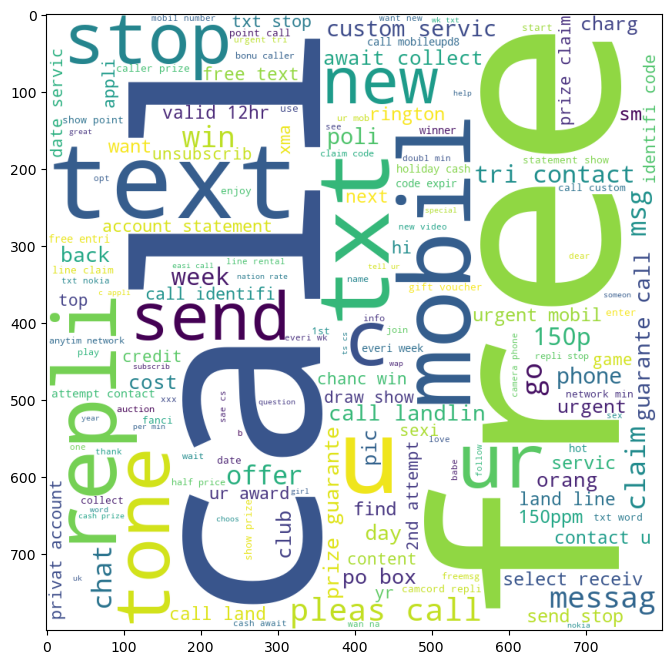

In [70]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

### most common words of ham(not spam)

In [71]:
ham_wc = wc.generate(data[data['target']==0]['tranaformed_msg'].str.cat(sep=" "))

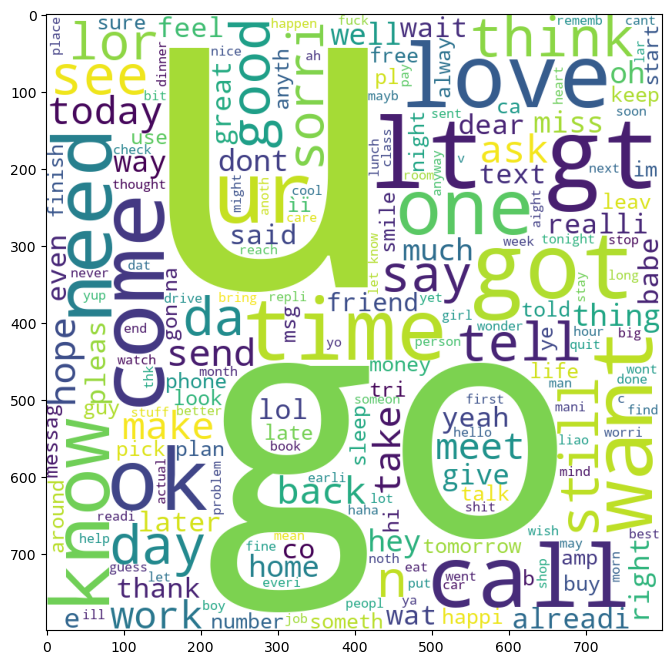

In [72]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

### commonly used top 50 words of spam and ham

In [73]:
data.head(5)

,target,msg,num_characters,num_words,num_sentences,tranaformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
for i in data[data['target']==1]['tranaformed_msg'].tolist():
    print(i)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [75]:
spam_corpus = []
for i in data[data['target']==1]['tranaformed_msg'].tolist():
    for word in i.split():
        spam_corpus.append(word)


In [76]:
len(spam_corpus) 

9939

* there are around 9939 words in all spam msgs together

In [77]:
from collections import Counter

Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [78]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [79]:
Counter(spam_corpus).most_common(30)[0]

('call', 320)

In [80]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


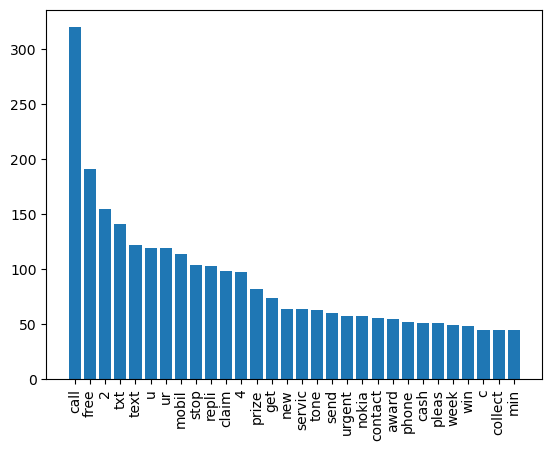

In [81]:
## 30 common words of  spam 

plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [82]:
ham_corpus = []
for i in data[data['target']==0]['tranaformed_msg'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [83]:
len(ham_corpus)

35404

In [84]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

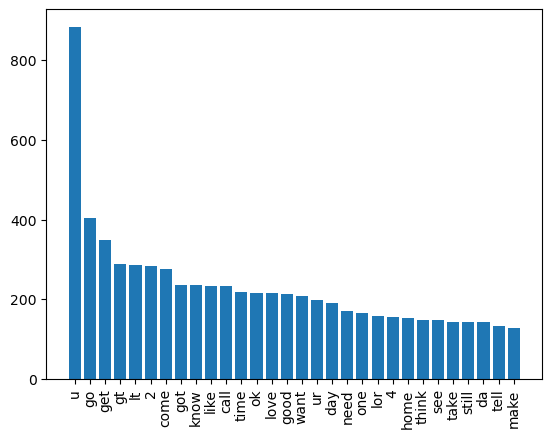

In [85]:
## 30 common words of ham 

plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

* now we need to convert text into numbers or vectors or vectorize

* so we use Text Vectorization : using bag of words
* in bag of words:   we create a column for frequency of all the words and we check the frequency in each msg
and this frequency of each msg becomes our vector

### count vectorizor

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [87]:
x = cv.fit_transform(data['tranaformed_msg']).toarray()

In [88]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
x.shape

(5169, 6708)

In [90]:
y = data['target'].values

In [91]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

* naive bayes works well for textual data

In [94]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [96]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision:",precision_score(y_test,y_pred1))


accuracy: 0.8684719535783365
confusion matrix: [[772 117]
 [ 19 126]]
precision: 0.5185185185185185


In [97]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision:",precision_score(y_test,y_pred2))

accuracy: 0.9661508704061895
confusion matrix: [[885   4]
 [ 31 114]]
precision: 0.9661016949152542


In [98]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision:",precision_score(y_test,y_pred3))

accuracy: 0.9738878143133463
confusion matrix: [[872  17]
 [ 10 135]]
precision: 0.8881578947368421


### Tfidf Vectorizer

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer()

In [100]:
x=tfidf.fit_transform(data['tranaformed_msg']).toarray()

In [101]:
y=data['target'].values

In [102]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision:",precision_score(y_test,y_pred1))


accuracy: 0.8636363636363636
confusion matrix: [[772 117]
 [ 24 121]]
precision: 0.5084033613445378


In [104]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision:",precision_score(y_test,y_pred2))

accuracy: 0.9661508704061895
confusion matrix: [[885   4]
 [ 31 114]]
precision: 0.9661016949152542


In [105]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision:",precision_score(y_test,y_pred3))

accuracy: 0.9613152804642167
confusion matrix: [[888   1]
 [ 39 106]]
precision: 0.9906542056074766


* here we go with multinomial naive bayes whose precision is 0.99(accuracy is not reliable in this case)
* it said that the sms as spam which actually is not spam --> only one case

### conclusion: 
* we go with TFIDF vectorizor --> multinomial naive bayes

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [107]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [108]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [109]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [110]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.9393939393939394)

In [112]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print("="*60)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9393939393939394
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  0.9906542056074766
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8095238095238095
For  LR
Accuracy -  0.9439071566731141
Precision -  0.865546218487395
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9477756286266924
Precision -  0.8421052631578947
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9916666666666667
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9519230769230769
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.968503937007874


In [113]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [114]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,xgb,0.974855,0.968504
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
6,AdaBoost,0.947776,0.842105


In [115]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.970019
3,NB,Accuracy,0.961315
4,xgb,Accuracy,0.974855
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,AdaBoost,Accuracy,0.947776


In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

* now run the algorithms again with tfidfVectorizor(max_features=3000) and append the performance table 2(new) with performance table 1(previous)

### tfidfVectorizor(max_features=3000)
* take most commly used 3000 words

In [137]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(data['tranaformed_msg']).toarray()
print("shape of X:",X.shape)
print("="*60)

y = data['target'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

print("GaussianNB:")
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision:",precision_score(y_test,y_pred1))
print("="*60)

print("MultinomialNB:")
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision:",precision_score(y_test,y_pred2))
print("="*60)

print("BernoulliNB")
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision:",precision_score(y_test,y_pred3))
print("="*60)

shape of X: (5169, 3000)
GaussianNB:
accuracy: 0.8694390715667312
confusion matrix: [[788 108]
 [ 27 111]]
precision: 0.5068493150684932
MultinomialNB:
accuracy: 0.9709864603481625
confusion matrix: [[896   0]
 [ 30 108]]
precision: 1.0
BernoulliNB
accuracy: 0.9835589941972921
confusion matrix: [[895   1]
 [ 16 122]]
precision: 0.991869918699187


* here with tfidfvectorizor(max_features), multinomial naive bayes gave 100% precision

In [117]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [118]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [119]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [120]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.896518,1.000000,0.905222,1.000000
1,ETC,0.973888,0.991667,0.974855,0.974576
2,RF,0.970019,0.991379,0.975822,0.982906
3,NB,0.961315,0.990654,0.970986,1.000000
4,xgb,0.974855,0.968504,0.967118,0.926230
5,GBDT,0.950677,0.951923,0.946809,0.919192
6,SVC,0.971954,0.939394,0.975822,0.974790
7,BgC,0.961315,0.877698,0.958414,0.868217
8,LR,0.943907,0.865546,0.958414,0.970297
9,AdaBoost,0.947776,0.842105,0.960348,0.929204


* with max_features=3000, naive bayes precision has become 1 and even accuracy also increased

* among all these algorithms, NAIVE BAYES is the powerful with highest precision and accuracy score

## min max scaling

#### scale the data with max_features=3000 and append this new performance table 3 with previus table 1,2

In [121]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = tfidf.fit_transform(data['tranaformed_msg']).toarray()

y = data['target'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

print("GaussianNB:")
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision:",precision_score(y_test,y_pred1))
print("="*60)

print("MultinomialNB:")
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision:",precision_score(y_test,y_pred2))
print("="*60)

print("BernoulliNB")
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision:",precision_score(y_test,y_pred3))
print("="*60)

GaussianNB:
accuracy: 0.8694390715667312
confusion matrix: [[788 108]
 [ 27 111]]
precision: 0.5068493150684932
MultinomialNB:
accuracy: 0.9709864603481625
confusion matrix: [[896   0]
 [ 30 108]]
precision: 1.0
BernoulliNB
accuracy: 0.9835589941972921
confusion matrix: [[895   1]
 [ 16 122]]
precision: 0.991869918699187


In [122]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [123]:
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [124]:
new_df_scaled = new_df.merge(temp_df2,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.896518,1.000000,0.905222,1.000000,0.905222,1.000000
1,ETC,0.973888,0.991667,0.974855,0.974576,0.974855,0.974576
2,RF,0.970019,0.991379,0.975822,0.982906,0.975822,0.982906
3,NB,0.961315,0.990654,0.970986,1.000000,0.970986,1.000000
4,xgb,0.974855,0.968504,0.967118,0.926230,0.967118,0.926230
5,GBDT,0.950677,0.951923,0.946809,0.919192,0.946809,0.919192
6,SVC,0.971954,0.939394,0.975822,0.974790,0.975822,0.974790
7,BgC,0.961315,0.877698,0.958414,0.868217,0.958414,0.868217
8,LR,0.943907,0.865546,0.958414,0.970297,0.958414,0.970297
9,AdaBoost,0.947776,0.842105,0.960348,0.929204,0.960348,0.929204


## adding num_characters to input

#### append num_characters column to data as input and comapre if accuracy and precision is increased

In [125]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(data['tranaformed_msg']).toarray()

# appending the num_character col to X
X = np.hstack((X,data['num_characters'].values.reshape(-1,1)))
print(X.shape)

y = data['target'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

print("GaussianNB:")
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred1))
print("confusion matrix:",confusion_matrix(y_test,y_pred1))
print("precision:",precision_score(y_test,y_pred1))
print("="*60)

print("MultinomialNB:")
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred2))
print("confusion matrix:",confusion_matrix(y_test,y_pred2))
print("precision:",precision_score(y_test,y_pred2))
print("="*60)

print("BernoulliNB")
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred3))
print("confusion matrix:",confusion_matrix(y_test,y_pred3))
print("precision:",precision_score(y_test,y_pred3))
print("="*60)

(5169, 3001)
GaussianNB:
accuracy: 0.8907156673114119
confusion matrix: [[807  89]
 [ 24 114]]
precision: 0.5615763546798029
MultinomialNB:
accuracy: 0.9410058027079303
confusion matrix: [[896   0]
 [ 61  77]]
precision: 1.0
BernoulliNB
accuracy: 0.9835589941972921
confusion matrix: [[895   1]
 [ 16 122]]
precision: 0.991869918699187


In [126]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

c:\Users\SRINIJA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9342359767891683
Precision -  0.8240740740740741
For  NB
Accuracy -  0.9410058027079303
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8703703703703703
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9622641509433962
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667


In [127]:
temp_df3 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [128]:
new_df_num_characters=new_df_scaled.merge(temp_df3,on='Algorithm')
new_df_num_characters

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.896518,1.000000,0.905222,1.000000,0.905222,1.000000,0.934236,0.824074
1,ETC,0.973888,0.991667,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
2,RF,0.970019,0.991379,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,NB,0.961315,0.990654,0.970986,1.000000,0.970986,1.000000,0.941006,1.000000
4,xgb,0.974855,0.968504,0.967118,0.926230,0.967118,0.926230,0.969052,0.941667
5,GBDT,0.950677,0.951923,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
6,SVC,0.971954,0.939394,0.975822,0.974790,0.975822,0.974790,0.866538,0.000000
7,BgC,0.961315,0.877698,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225
8,LR,0.943907,0.865546,0.958414,0.970297,0.958414,0.970297,0.961315,0.962264
9,AdaBoost,0.947776,0.842105,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624


#### conclusion:
* here with num_characters input, accuracy has decreased(for Naive bayes too) so we do not go with this model

* overall, tfidfvectorizor(max_features=3000) was giving of ggo results in terms of accuracy as well as precision.

### Voting Classifier

In [129]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [130]:
from sklearn.ensemble import VotingClassifier

In [131]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [132]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


#### conclusion:
* here with voting classifier precision is 100% but accuracy has decreased so we are not going with this model

### stacking

In [133]:
# Applying stacking

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [134]:
from sklearn.ensemble import StackingClassifier

In [135]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [136]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9375


#### conclusion:
* even with stacking we are not getting any better results. so we are not going with this model.

#### we go with Multinomial Naive bayes --> this is our best performing model so far with tfidfvectorizor(max_features=3000)

### new data and model.pkl

* for any data, 
* step1: we need to first preprocess(transform)
* step2: vectorization
* step3: applying algorithm on vectorization

* so we store these steps in pickle files

In [138]:
import pickle
pickle.dump(tfidf,open('tfidf_vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnb_model.pkl','wb'))